In [2]:
import  pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt

%matplotlib inline

import requests
from urllib.parse import urlencode

In [3]:
users_id = pd.read_csv('/home/jupyter-m-durova-19/olist_customers_dataset.csv')
users_id.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

orders = pd.read_csv(download_url)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

product = pd.read_csv(download_url)
product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
#переводим колонки с датой в формат времени 

In [7]:
orders[['order_purchase_timestamp', 
        'order_approved_at', 
        'order_delivered_carrier_date', 
        'order_delivered_customer_date', 
        'order_estimated_delivery_date']]= orders[['order_purchase_timestamp', 
                                                   'order_approved_at', 
                                                   'order_delivered_carrier_date', 
                                                   'order_delivered_customer_date', 
                                                   'order_estimated_delivery_date']].apply(pd.to_datetime)

In [8]:
product['shipping_limit_date'] = product['shipping_limit_date'].apply(pd.to_datetime)

In [9]:
#1. Сколько у нас пользователей, которые совершили покупку только один раз? 
# что считать покупкой - статус заказа: created —  создан,
#                                       approved —  подтверждён,
#                                       invoiced —  выставлен счёт,
#                                       processing —  в процессе сборки заказа, 
#                                       shipped —  отгружен со склада, 
#                                       delivered —  доставлен пользователю,
# но при этом order_approved_at не равен NaT, т.е. есть факт оплаты.
# статусы unavailable —  недоступен и canceled —  отменён даже при наличии оплаты на мой взгляд означают, 
# что деньги должны будут возвращены

In [10]:
df = users_id.merge(orders, on='customer_id') \
    .merge(product, on='order_id') \
    .query('order_status != "unavailable" and order_status != "canceled" and order_approved_at != "NaT"')

In [11]:
num_of_one_purchase_users = df.groupby('customer_unique_id', as_index = False) \
    .agg({'customer_id' : 'nunique'}) \
    .rename(columns = {'customer_id' : 'number_of_orders'}) \
    .query('number_of_orders == 1') \
    .shape[0]

In [12]:
num_of_one_purchase_users

92084

In [13]:
#2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

#к недоставленным заказам я отнесла все заказы в конретном месяце, у которых статус не является "delivered". 
#Соответсвенно, есть конкретная причина, почему заказ еще недоставен.

In [14]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [15]:
order_delivery = orders[['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date']]

In [16]:
order_delivery.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [17]:
order_delivery['month'] = order_delivery.order_purchase_timestamp.dt.month

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
order_delivery['year'] = order_delivery.order_purchase_timestamp.dt.year

In [19]:
order_delivery.query('order_delivered_customer_date == "NaT" and order_status != "delivered"') \
    .fillna(1) \
    .groupby(['year', 'month', 'order_status'], as_index = False) \
    .agg({'order_delivered_customer_date' : 'count'}) \
    .groupby('order_status') \
    .agg({'order_delivered_customer_date' : 'mean'}) \
    .rename(columns = {'order_delivered_customer_date' : 'average_nondelivery_per_month'})  

,average_nondelivery_per_month
order_status,
approved,1.000000
canceled,25.791667
created,1.666667
invoiced,14.952381
processing,15.842105
shipped,48.130435
unavailable,29.000000


In [20]:
#3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

#если мы в данном задании говорим именно про покупки, то как я определила выше:
# "что считать покупкой - статус заказа: created —  создан,
#                                       approved —  подтверждён,
#                                       invoiced —  выставлен счёт,
#                                       processing —  в процессе сборки заказа, 
#                                       shipped —  отгружен со склада, 
#                                       delivered —  доставлен пользователю,
# но при этом order_approved_at не равен NaT, т.е. есть факт оплаты.
# статусы unavailable —  недоступен и canceled —  отменён даже при наличии оплаты на мой взгляд означают, 
# что деньги должны будут возвращены"

In [21]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [22]:
df['weekday'] = df.order_approved_at.dt.day_name()

In [23]:
df.groupby(['product_id', 'weekday'], as_index = False) \
    .agg({'seller_id' : 'count'}) \
    .rename(columns = {'seller_id' : 'purchase_number'}) \
    .groupby('product_id', as_index = False) \
    .first() \
    .sort_values('purchase_number', ascending = False) 

,product_id,weekday,purchase_number
21957,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
8553,422879e10f46682990de24d770e7f83d,Friday,87
19597,99a4788cb24856965c36a24e339b6058,Friday,69
10760,53759a2ecddad2bb87a079a1f1519f73,Friday,68
7313,389d119b48cf3043d311335e499d9c6b,Friday,59
...,...,...,...
11954,5cbca81261e661159b5a3e6025bffba8,Monday,1
11953,5cb96c51c55f57503465e4d2558dc053,Tuesday,1
11952,5cb9696a7256c0bd3fa974570c74a13d,Wednesday,1
11951,5cb678a06e40c3a2e49564fd664dac70,Monday,1


In [24]:
#4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
#Не стоит забывать, что внутри месяца может быть не целое количество недель. 
#Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [25]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Sunday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


In [26]:
#определяем покупки и добавляем новые колонки

In [27]:
purchase = df.assign(year = df.order_purchase_timestamp.dt.year, 
                month = df.order_purchase_timestamp.dt.month, 
                days_in_month = df.order_purchase_timestamp.dt.days_in_month)

In [28]:
purchase.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday,year,month,days_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017,5,31
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018,1,31
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Sunday,2018,5,31
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday,2018,3,31
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday,2018,7,31


In [29]:
purchase = purchase.groupby(['customer_unique_id', 'year', 'month', 'days_in_month'], as_index=False) \
    .agg({'customer_state' : 'count'}) \
    .rename(columns = {'customer_state' : 'num_of_purchase'}) 
  

In [30]:
purchase['weeks_in_month'] = round(purchase.days_in_month / 7, 2)

In [31]:
purchase['num_of_orders_per_week'] = purchase.num_of_purchase / purchase.weeks_in_month

In [32]:
purchase

,customer_unique_id,year,month,days_in_month,num_of_purchase,weeks_in_month,num_of_orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,31,1,4.43,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,31,1,4.43,0.225734
2,0000f46a3911fa3c0805444483337064,2017,3,31,1,4.43,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,31,1,4.43,0.225734
4,0004aac84e0df4da2b147fca70cf8255,2017,11,30,1,4.29,0.233100
...,...,...,...,...,...,...,...
96842,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,30,2,4.29,0.466200
96843,fffea47cd6d3cc0a88bd621562a9d061,2017,12,31,1,4.43,0.225734
96844,ffff371b4d645b6ecea244b27531430a,2017,2,28,1,4.00,0.250000
96845,ffff5962728ec6157033ef9805bacc48,2018,5,31,1,4.43,0.225734


In [33]:
purchase[['customer_unique_id', 'year', 'month', 'num_of_orders_per_week']]

,customer_unique_id,year,month,num_of_orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,0.225734
2,0000f46a3911fa3c0805444483337064,2017,3,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,0.225734
4,0004aac84e0df4da2b147fca70cf8255,2017,11,0.233100
...,...,...,...,...
96842,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,0.466200
96843,fffea47cd6d3cc0a88bd621562a9d061,2017,12,0.225734
96844,ffff371b4d645b6ecea244b27531430a,2017,2,0.250000
96845,ffff5962728ec6157033ef9805bacc48,2018,5,0.225734


In [34]:
#5. Используя pandas, проведи когортный анализ пользователей. 
#В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

In [35]:
df5 = df[['customer_id', 'customer_unique_id', 'order_purchase_timestamp', 'order_approved_at']] 
  

In [36]:
df5 = df5.assign(order_period = df.order_approved_at.dt.strftime('%Y-%m')) 
#Определим в OrderPeriod месяц и год когда была совершена покупка

In [37]:
df5.shape


(112086, 5)

In [38]:
df5.customer_unique_id.nunique()

94970

In [39]:
df5.head()

,customer_id,customer_unique_id,order_purchase_timestamp,order_approved_at,order_period
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07


In [40]:
#Группировка данных по первой покупке клиента

In [41]:
df5.set_index('customer_unique_id', inplace=True) #добавим индекс в dataFrame по customer_unique_id

In [42]:
df5['join_month'] = df5.groupby(level=0)['order_approved_at'].min().apply(lambda x: x.strftime('%Y-%m')) 
#добавим столбец JoinMonth (первая покупка)

In [43]:
df5.reset_index(inplace=True) #переиндексируем df

In [44]:
df5.insert(len(df5.columns), 'total_orders', 0, allow_duplicates=False) 
#создадим столбец в котором далее поместим количество заказов

In [45]:
df5.head()

,customer_unique_id,customer_id,order_purchase_timestamp,order_approved_at,order_period,join_month,total_orders
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05,2017-05,0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01,2018-01,0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-05,2018-05,0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03,2018-03,0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07,2018-07,0


In [46]:
#Объединим группы

In [47]:
grouped = df5.groupby(['join_month', 'order_period'])

In [48]:
# количество уникальных пользователей и общее количество заказов и выручка за период
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique,
 'total_orders': pd.Series.count})
 

In [49]:
cohorts.head()

customer_unique_id  total_orders
join_month order_period                                  
2016-09    2016-09                        1             3
2016-10    2016-10                      288           344
           2017-04                        1             1
           2017-07                        1             1
           2017-09                        1             1

In [50]:
# переименуем некоторые столбцы для большей наглядности
cohorts.rename(columns={'customer_unique_id': 'total_users',
 'total_orders': 'total_orders'}, inplace=True)
cohorts.head()

total_users  total_orders
join_month order_period                           
2016-09    2016-09                 1             3
2016-10    2016-10               288           344
           2017-04                 1             1
           2017-07                 1             1
           2017-09                 1             1

In [51]:
#Упорядочивание.

In [52]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1 # отсчет с 1
    return df


In [53]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_users  total_orders  cohort_period
join_month order_period                                          
2016-09    2016-09                 1             3              1
2016-10    2016-10               288           344              1
           2017-04                 1             1              2
           2017-07                 1             1              3
           2017-09                 1             1              4

In [54]:
#Считаем Retention.

In [55]:
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_period','join_month'], inplace=True)

In [56]:
cohorts

order_period  total_users  total_orders
cohort_period join_month                                        
1             2016-09         2016-09            1             3
              2016-10         2016-10          288           344
2             2016-10         2017-04            1             1
3             2016-10         2017-07            1             1
4             2016-10         2017-09            1             1
...                               ...          ...           ...
3             2018-06         2018-08           16            22
1             2018-07         2018-07         5915          6718
2             2018-07         2018-08           30            33
1             2018-08         2018-08         6356          7200
2             2018-08         2018-09            1             1

[220 rows x 3 columns]

In [57]:
# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['total_users'].groupby(level=1).first()
cohort_group_size.head()

join_month
2016-09       1
2016-10     288
2016-12       1
2017-01     716
2017-02    1674
Name: total_users, dtype: int64

In [58]:
cohorts['total_users'].head()

cohort_period  join_month
1              2016-09         1
               2016-10       288
2              2016-10         1
3              2016-10         1
4              2016-10         1
Name: total_users, dtype: int64

In [59]:
cohorts['total_users'].unstack(0).head(15)

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
join_month,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,288.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1674.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0
2017-03,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2301.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN
2017-05,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,8.0,NaN,NaN
2017-06,3110.0,14.0,11.0,12.0,8.0,11.0,11.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN


In [60]:
#Изменим данные, так, чтобы показать доли возврата от первоначального размера когорты.

In [61]:
user_retention = cohorts['total_users'].unstack(0).divide(cohort_group_size, axis=0)
user_retention

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
join_month,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.003472,0.003472,0.003472,0.003472,0.003472,0.003472,0.006944,0.006944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,0.002793,0.002793,0.006983,0.004190,0.001397,0.001397,0.002793,0.004190,0.001397
2017-02,1.0,0.002389,0.002389,0.001792,0.004182,0.001195,0.002389,0.001792,0.000597,0.001792,0.001195,0.002987,0.001195,0.001792,0.001195,0.000597,0.000597,0.002389
2017-03,1.0,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163,0.003876,0.001163,0.002326,0.001163,0.001550,0.002326,0.000775,0.001550
2017-04,1.0,0.006084,0.002173,0.001738,0.002608,0.002608,0.003477,0.002608,0.003477,0.001738,0.002173,0.000869,0.000869,0.000435,0.000869,0.000869,0.001304,NaN
2017-05,1.0,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411,0.002540,0.002540,0.002822,0.003387,0.001976,0.000564,0.001976,0.002258,NaN,NaN
2017-06,1.0,0.004502,0.003537,0.003859,0.002572,0.003537,0.003537,0.002251,0.001286,0.002251,0.003215,0.003537,0.001608,0.001286,0.001929,NaN,NaN,NaN


In [62]:
#Визуализируй это!

In [63]:
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['join_month','cohort_period'], inplace=True) 
#транспонировали, просто поменяв местами JoinMonth и CohortPeriod и далее добавим axis=1

In [64]:
cohorts

order_period  total_users  total_orders
join_month cohort_period                                        
2016-09    1                  2016-09            1             3
2016-10    1                  2016-10          288           344
           2                  2017-04            1             1
           3                  2017-07            1             1
           4                  2017-09            1             1
...                               ...          ...           ...
2018-06    3                  2018-08           16            22
2018-07    1                  2018-07         5915          6718
           2                  2018-08           30            33
2018-08    1                  2018-08         6356          7200
           2                  2018-09            1             1

[220 rows x 3 columns]

In [65]:
# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['total_users'].groupby(level=0).first()
cohorts['total_users'].unstack(0)
user_retention = cohorts['total_users'].unstack(0).divide(cohort_group_size, axis=1)

In [66]:
user_retention = user_retention.drop(columns = ['2016-09', 
                               '2016-10', 
                               '2016-12', 
                               '2018-01', 
                               '2018-02', 
                               '2018-03', 
                               '2018-04', 
                               '2018-05', 
                               '2018-06', 
                               '2018-07', 
                               '2018-08']).loc[2:18] 
# оставляем только нудные данные - январь-декабрь 2017, и убирает из значений первый месяц с долей 1.0

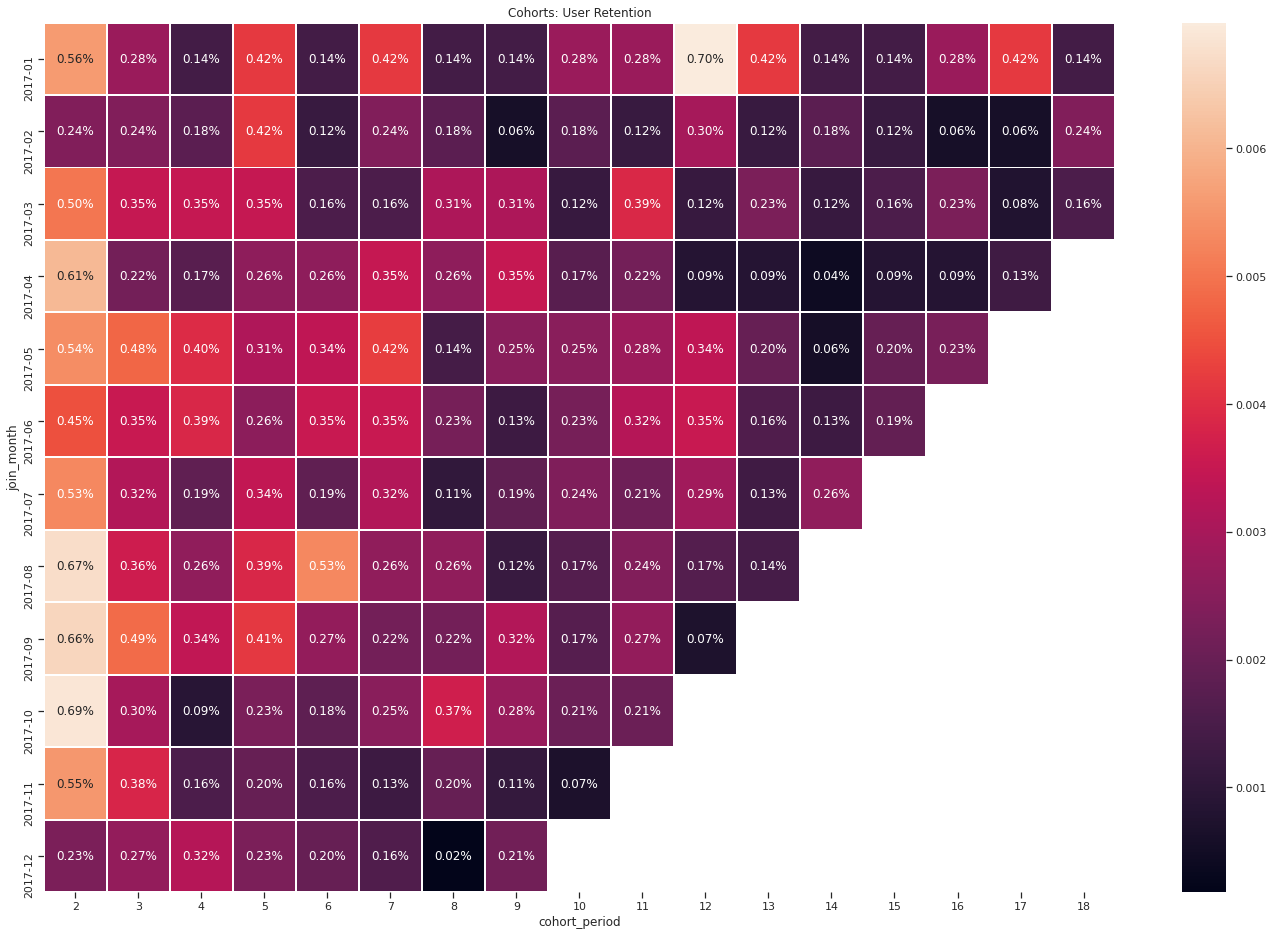

In [67]:
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.2%', linewidths=1);

In [68]:
# Из чего делаем вывод: 2017-05 - когорта с самым высоким retention на 3й месяц

In [69]:
#6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
# Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
# В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, 
# F - суммарное количество покупок у пользователя за всё время,
# M - сумма покупок за всё время. 
# Подробно опиши, как ты создавал кластеры. 
# Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 
# Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) 
# имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, 
# monetary от 1780 до 3560 рублей в неделю.

In [70]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Sunday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


In [71]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'weekday'],
      dtype='object')

In [72]:

df6 = df[['customer_id', 'customer_unique_id', 'order_id', 'order_item_id', 'product_id', 'order_approved_at','price']]

In [73]:
df6['purchase_date'] = df6.order_approved_at.dt.strftime('%Y-%m')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df6

,customer_id,customer_unique_id,order_id,order_item_id,product_id,order_approved_at,price,purchase_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,2017-05-16 15:22:12,124.99,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,1,4aa6014eceb682077f9dc4bffebc05b0,2018-01-12 20:58:32,289.00,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,1,bd07b66896d6f1494f5b86251848ced7,2018-05-20 16:19:10,139.94,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,1,a5647c44af977b148e0a3a4751a09e2e,2018-03-13 17:29:19,149.94,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,1,9391a573abe00141c56e38d84d7d5b3b,2018-07-29 10:10:09,230.00,2018-07
...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,1,ccb4503d9d43d245d3b295d0544f988b,2018-04-07 16:08:45,74.90,2018-04
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1,9ede6b0570a75a4b9de4f383329f99ee,2018-04-04 08:35:12,114.90,2018-04
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,1,7a5d2e1e131a860ae7d18f6fffa9d689,2018-04-08 20:30:03,37.00,2018-04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,1,f819f0c84a64f02d3a5606ca95edd272,2017-11-03 21:31:20,689.00,2017-11


In [75]:
#какие временные границы
print(df6.purchase_date.min())
print(df6.purchase_date.max())

2016-09
2018-09


In [76]:
# но из прошлого задания мы знаем, что данные за полный год есть только для 2017 года. Поэтому оставим только его.

In [77]:
df6.purchase_date.unique()

array(['2017-05', '2018-01', '2018-05', '2018-03', '2018-07', '2017-09',
       '2018-02', '2017-11', '2018-04', '2018-08', '2018-06', '2017-08',
       '2017-10', '2017-04', '2017-06', '2017-12', '2017-01', '2017-07',
       '2017-03', '2017-02', '2016-10', '2016-09', '2016-12', '2018-09'],
      dtype=object)

In [78]:
year_2017 = ['2017-01', '2017-02', '2017-03', '2017-04', 
             '2017-05', '2017-06', '2017-07', '2017-08', 
             '2017-09', '2017-10', '2017-11', '2017-12']

In [79]:
df6.query('purchase_date in @year_2017', inplace=True)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
df6.head()

,customer_id,customer_unique_id,order_id,order_item_id,product_id,order_approved_at,price,purchase_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,2017-05-16 15:22:12,124.99,2017-05
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,1,0be701e03657109a8a4d5168122777fb,2017-09-14 18:25:11,259.90,2017-09
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,1093c8304c7a003280dd34598194913d,1,124f74f703e88efe001a10bfa718b6ff,2017-11-16 19:55:41,19.90,2017-11
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,8428e578bb1cf839ae26a6b7615502b9,1,6b874ff4c71d18e91079b40396bf176a,2017-11-27 18:01:20,25.30,2017-11
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,83d8f70418eefd96f37b483dff430305,1,3fc00af0f0a8d4ac2933d3900416c977,2017-09-09 10:10:17,99.00,2017-09


In [81]:
df6.order_id.nunique()

44304

In [82]:
orders = df6.groupby(['order_id', 'order_approved_at', 'customer_unique_id']) \
    .agg({'price': 'sum'}).reset_index()
orders.head()

,order_id,order_approved_at,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.9
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.9
2,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.9
3,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-17 03:55:27,85c835d128beae5b4ce8602c491bf385,21.9
4,00054e8431b9d7675808bcb819fb4a32,2017-12-10 12:10:31,635d9ac1680f03288e72ada3a1035803,19.9


In [83]:
orders.shape

(44304, 4)

In [84]:
orders.dtypes

order_id                      object
order_approved_at     datetime64[ns]
customer_unique_id            object
price                        float64
dtype: object

In [85]:
# устанавливаем дату, отнсительно которой будем считать Recency score. Это 1 день плюс к дате последней покупки
NOW = orders['order_approved_at'].max() + timedelta(days=1)
NOW

Timestamp('2018-01-01 23:32:40')

In [86]:
period = 365

In [87]:
# считаем Recency, Frequency и Monetary Value для каждого покупателя

In [88]:
orders['days_since_order'] = orders['order_approved_at'].apply(lambda x: (NOW - x).days) #считаем количество дней между датой покупки и текущей датой

In [89]:
# далее будем искать минимальное значение days_since_order для каждого клиента (the Recency) + Frequency

In [90]:
aggr = {
    'days_since_order': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_approved_at': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
}

In [91]:
rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'recency', 'order_approved_at': 'frequency'}, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency
0,0000f46a3911fa3c0805444483337064,297,1
1,0000f6ccb0745a6a4b88665a16c9f078,81,1
2,0004aac84e0df4da2b147fca70cf8255,48,1
3,0005e1862207bf6ccc02e4228effd9a0,302,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1


In [92]:
rfm.shape

(42960, 3)

In [93]:
#добавляем значение Monetary

#rfm['monetary'] = rfm['customer_unique_id'].apply(lambda x: orders[(orders['customer_unique_id'] == x) & \
                                                         #  (orders['order_approved_at'] >= NOW - timedelta(days=period))]\

In [94]:
rfm['monetary'] = orders.groupby('customer_unique_id', as_index=False) \
    .agg({'price' : 'sum'}) \
    .rename(columns = {'price' : 'monetary'}) \
    .monetary

In [95]:
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000f46a3911fa3c0805444483337064,297,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90


In [96]:
# сделаем ранжирование каждой из величин (recency	frequency	monetary) по квантилям (по 20%)
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 38.0, 0.4: 92.0, 0.6: 156.0, 0.8: 232.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 68.9, 0.6: 108.71999999999935, 0.8: 179.96}}

In [97]:
rfm.frequency.value_counts()

1    41741
2     1124
3       76
4       13
5        4
9        1
6        1
Name: frequency, dtype: int64

In [98]:
# меньшее значение recency лучше (score 5)
# кроме того, для frequency деление по квантилям не подходит в данном конкретном случае.
# поэтому : ранг 1 - для количества покупок 1,
#            ранг 2 - для количества покупок 2,
#            ранг 3 - для количества покупок 3,
#            ранг 4 - для количества покупок 4,
#            ранг 5 - если покупок > 4

In [99]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def f_score(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 3:
        return 3
    elif x <= 4:
        return 4
    else:
        return 5 
    
def m_score(x):
    if x <= quintiles['monetary'][.2]:
        return 1
    elif x <= quintiles['monetary'][.4]:
        return 2
    elif x <= quintiles['monetary'][.6]:
        return 3
    elif x <= quintiles['monetary'][.8]:
        return 4
    else:
        return 5     

In [100]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [101]:
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,3
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,4,1,5
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1
...,...,...,...,...,...,...,...
42955,fffbf87b7a1a6fa8b03f081c5f51a201,5,1,149.00,5,1,4
42956,fffcf5a5ff07b0908bd4e2dbc735a684,207,1,1570.00,2,1,5
42957,fffea47cd6d3cc0a88bd621562a9d061,22,1,64.89,5,1,2
42958,ffff371b4d645b6ecea244b27531430a,328,1,89.90,1,1,3


In [102]:
# далее получим RFM Score для каждого клиента
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,3,113
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,4,1,5,415
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1,211


In [103]:
# разделим наших клиентов на 10 сегментов:
#        Champions - покупали недавер, покупают часто и больше потратили
#        Loyal Customers - покурабт на регушятгой основе. реагируют на рекламные акции.
#        Potential Loyalist - Недавние клиенты со средней частотой.
#        Recent Customers(new customers) - покупали совсем недавно, но не часто.
#        Promising - недавние покуратели, но тратят мало.
#        Customers Needing Attention - все показатели выше среднего. Хотя, возможно, купил не совсем недавно.
#        About To Sleep - ниже средних показателей recency и frequency. Потеряет их, если не активируется повторно.
#        At Risk - Покупали часто, но уже давно. Нужно их вернуть назад!
#        Can’t Lose Them - раньше покупали, но уже не возвращались долгое время.
#        Hibernating - полследняя покупка было очень давно и маленькое количество заказов. Возможно потеряны.
#        

In [104]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)
rfm.head(10)

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,segment
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,3,113,hibernating
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411,promising
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,4,1,5,415,promising
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114,hibernating
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1,211,hibernating
5,00082cbe03e478190aadbea78542e933,41,1,79.00,4,1,3,413,promising
6,000a5ad9c4601d2bbdd9ed765d5213b3,143,1,76.99,3,1,3,313,about to sleep
7,000bfa1d2f1a41876493be685390d6d3,94,1,35.00,3,1,1,311,about to sleep
8,000c8bdb58a29e7115cfc257230fb21b,19,1,13.90,5,1,1,511,new customers
9,000de6019bb59f34c099a907c151d855,137,1,229.80,3,1,5,315,about to sleep


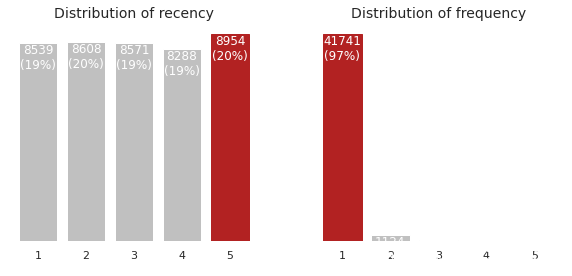

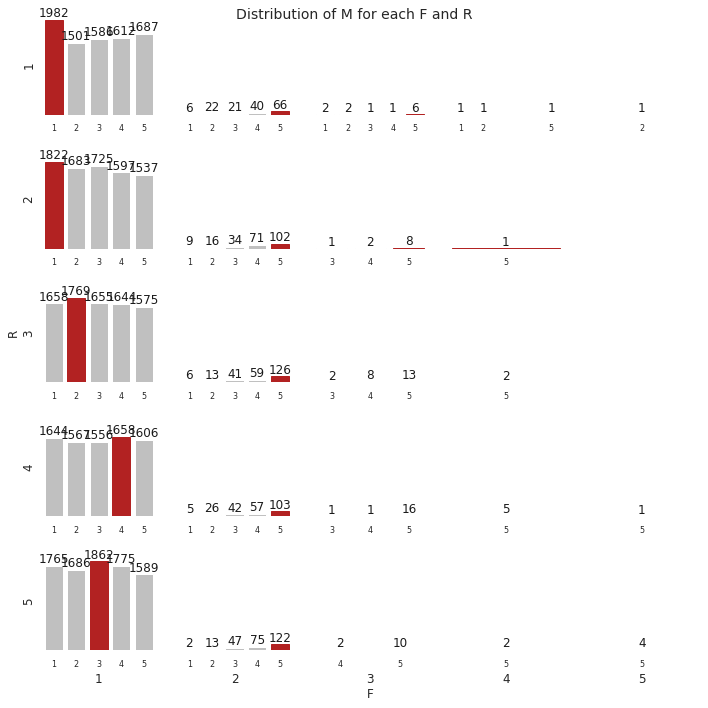

In [105]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'recency', 'F':'frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

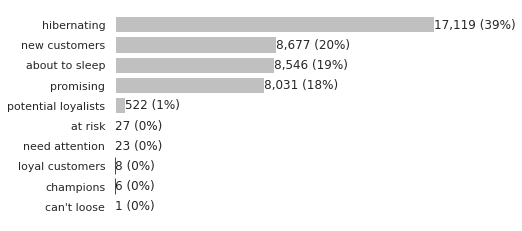

In [106]:
# count the number of customers in each segment
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()